### <font color='blue'>文脈を利用した品詞のタグ付け</font>

前回に作成した品詞に対する素性抽出関数は、出現する単語のみに対してチェックしていた。<br>
したがって、fly の前に a が存在していても動詞と判断する。<br>

ここでは文脈を利用した品詞のタグ付けについて紹介する。<br>

### <font color='blue'>文脈を分析する素性検出器を利用した品詞分類器</font>

In [4]:
# 必要なライブラリのimport
import nltk
from nltk.corpus import brown

In [5]:
# 文脈を分析する素性抽出器
def pos_features(sentence, i):
    features = {"suffix(1)": sentence[i][-1:],
                "suffix(2)": sentence[i][-2:],
                "suffix(3)": sentence[i][-3:]}
    if i == 0:
        features["prev-word"] = "<START>"
    else:
        features["prev-word"] = sentence[i-1]
    return features

In [15]:
# どのように素性抽出が行われているかどうか
pos_features(brown.sents()[0], 0)

{'prev-word': '<START>',
 'suffix(1)': 'e',
 'suffix(2)': 'he',
 'suffix(3)': 'The'}

In [16]:
# タグ付けされたブラウンコーパスの読み込み
tagged_sents = brown.tagged_sents(categories='news')

In [17]:
featuresets = []

In [18]:
# 特徴量の抽出
for tagged_sent in tagged_sents:
    untagged_sent = nltk.tag.untag(tagged_sent)
    for i, (word, tag) in enumerate(tagged_sent):
        featuresets.append( (pos_features(untagged_sent, i), tag) )

In [19]:
size = int(len(featuresets) * 0.1)

In [21]:
# 学習データ、テストデータの作成
train_set, test_set = featuresets[size:], featuresets[:size]

In [22]:
# NaiveBayes学習
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [23]:
# テストデータを学習器にかける
nltk.classify.accuracy(classifier, test_set)

0.7891596220785678

### <font color='blue'>系列分類</font>

分類タスク間での依存関係を利用するために、同時分類器を利用可能。<br>
これは、複数の入力の集合を適切にラベル付けする。<br>

品詞タグ付けでは、与えられた文中すべての単語の品詞タグを選択するために<br>
様々な種類の系列分類器モデルを同時に使用。<br>

連続分類、貪欲系列分類は最初の入力に対してもっともありそうなラベルを探し出し、続いてその結果を次の入力のラベル付けに反映する。<br>
これは、バイグラムタガーと同じアプローチである。<br>

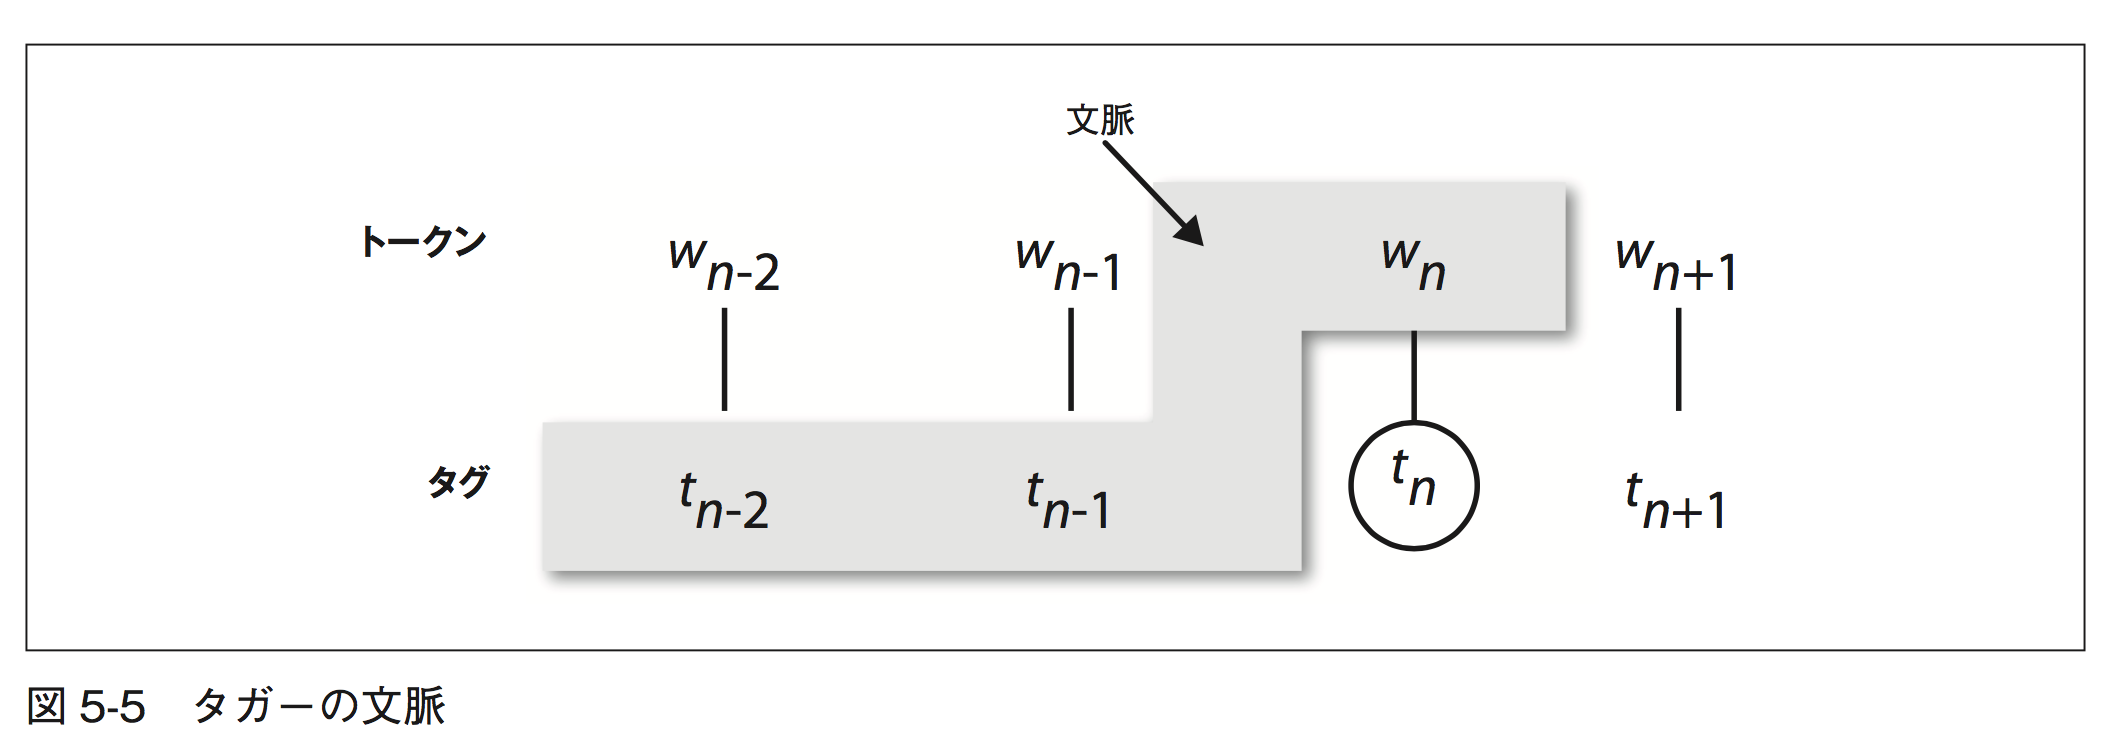

In [24]:
from IPython.display import Image
Image(filename='IMG/5-1.png', width=600)